### Coding Challenge #4: Sentiment Analysis

In this Coding Challenge, you will decipher the sentiment within a large set of tweets regarding a specific topic on Twitter in an autonomous fashion. 

**Challenge **

**1)** Construct a Twitter Sentiment Analyzer. The Sentiment Analyzer will search twitter for a list of tweets about any topic of choice, then it will analyze each tweet to ascertain whether a positive or negative emotion is expressed in the tweet

**2)** Create a graph of polarity to determine whether the trend over time is a positive one or a negative one. *Hint*: you will have to define a StreamListener instance to continuously listen in on a specific topic and then graph the polarity to showcase the trend (i.e. positive or negative)

***Setup***:

Before you can work on the challenge, the following items need to be taken care of:

1) Install dependencies: a) pip install tweepy - library for accessing the twitter API, b) textblob (pip install textblob) which will facilitate the actual task of performing sentiment analysis.

2) You need data - tweepy lets you get data live from the Twitter API, which you have to register for. a) Go to https://apps.twitter.com, b) click on "Create New Application", c) Under Application details, enter name, description, website details (can be anything), d) click on "Create Application" and e) make a note of the tokens on the "Keys and Access Tokens" tab.

If you are blocked on the Twitter API/tweepy step, it is okay to manually get or code some test tweets to still use for sentiment analysis, and revisit the API step later. Good luck!

In [2]:
!pip install tweepy

    100% |████████████████████████████████| 286kB 4.7MB/s 
  Running setup.py bdist_wheel for PySocks ... - done
  Stored in directory: /content/.cache/pip/wheels/22/5c/b5/12e0dfdfa85bea67b23628b6425fae715c687e947a45ee3df9
Successfully built PySocks


In [4]:
!pip install textblob

    100% |████████████████████████████████| 634kB 5.1MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
from textblob import TextBlob

### Authentication

In [0]:
# replace with your access tokens

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

### Sentiment Analysis

In [0]:
class SentimentAnalyzer(tweepy.StreamListener):

    def on_status(self, status):
        global sentiments
        
        blob = TextBlob(status.text)
        sentiment = blob.sentiment.polarity
        sentiments.append(sentiment)

In [0]:
myStreamListener = SentimentAnalyzer()
myStream = tweepy.Stream(auth=api.auth, listener=myStreamListener)

In [0]:
sentiments = []
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
myStream.filter(track=['china'], async=True)

### Polarity Graph

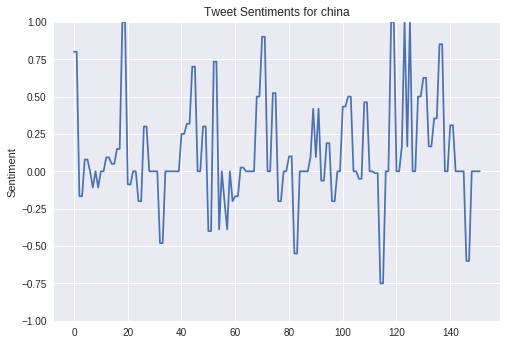

In [74]:
current_sentiments = np.copy(sentiments)
plt.plot(range(len(current_sentiments)), current_sentiments)
plt.title("Tweet Sentiments for " + 'china')
plt.ylabel('Sentiment'), plt.ylim(-1, 1);

### Wrapper Function

In [0]:
def collect_sentiments(track, listening_seconds=5, verbose=True):
    global sentiments
    sentiments = []
    myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
    myStream.filter(track=[track], async=True)
    
    if verbose:
        print('listening...')
    time.sleep(listening_seconds)
    del myStream
    
    current_sentiments = np.copy(sentiments)
    
    plt.plot(range(len(current_sentiments)), current_sentiments)
    plt.title("Tweet Sentiments for " + track)
    plt.ylabel('Sentiment'), plt.ylim(-1, 1)
    plt.show()
    return sentiments

listening...


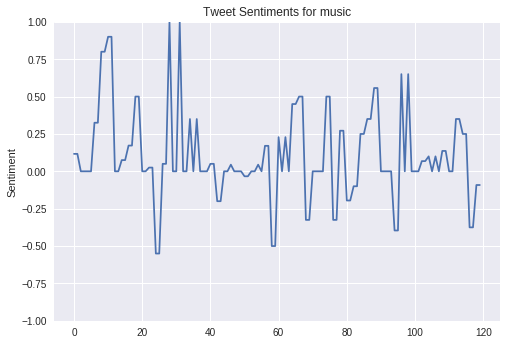

In [106]:
collect_sentiments('music', 1);

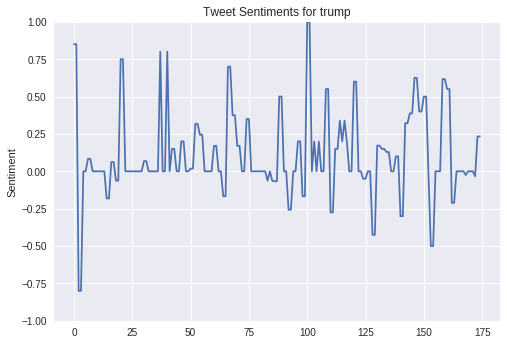

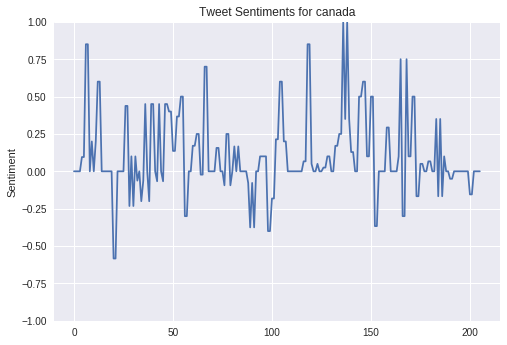

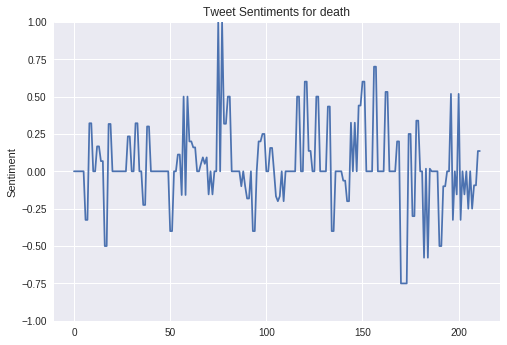

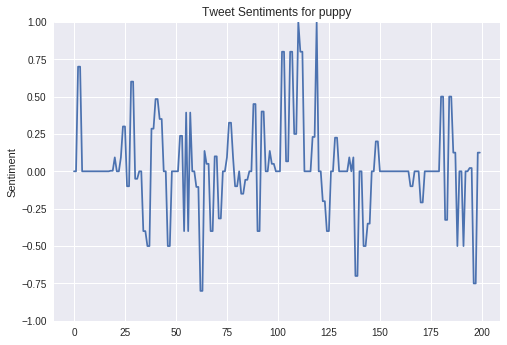

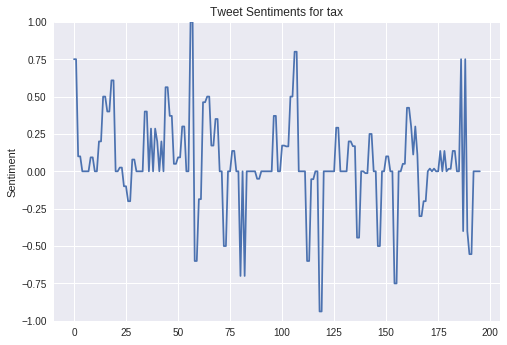

In [108]:
seconds = 1.5

for topic in ['trump', 'canada', 'death', 'puppy', 'tax']:
    collect_sentiments(topic, seconds, verbose=False)